In [57]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Ideas:
    1. initalizing guess:
        A. rejection sampling relative to pdf
        B. convultion prior to rejection sampling 
    2. issues:
        A. x space should extend beyond possible means
        B. extension should be by some sigma

In [2]:
#Special Ditribution Function
#'v' : array float: mu center of normal
#'s' : float: sigma standard deviation
def pdf(x,v,s):
    dist = 0
    num = len(v)
    for m in v:
        dist = dist + 1/(np.sqrt(2*np.pi)*s)*np.exp(-.5*((x-m)/s)**2)
    return dist/num


def Pdf(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-.5*((x-m)/s)**2)

In [3]:
#Expectation Maximization Algorithm 1D using pdf
#Assumption: variance of all normals is the same
#INPUTS:
# 'x' array : positions for probability density values
# 'p': array : probabilty density values over 'x'
# 'guess': array :initial 'k' guesses of centers of normals
# 'ite': int : number of iterations for EM 
#OUTPUTS:
# 'mu' : array : values of centers of normal
def EM(x,p,guess,ite):
    k = len(guess)
    n = len(x)
    
    #likelihood function (includes prior)
    #alt: prior = could np.sum(p*likeli)/np.sum(p)
    likeli = np.zeros((k,n))
    
    for j in range(ite):
        for i in range(k):
            likeli[i,:] = p*Pdf(x,guess[i],1)
        norm = np.sum(likeli, axis = 0)
        likeli = likeli/norm
        
        #weighted center of mass given likeli with prior
        guess = np.nansum(likeli*x*p, axis = 1)/np.nansum(likeli*p, axis = 1)
    mu = guess
    return mu

#Includes graphical output
def EM_graph(x,p,guess,ite):
    k = len(guess)
    n = len(x)
    
    plt.title('Intial distibution with guesses')
    plt.plot(x,p)
    plt.vlines(guess, 0, np.max(p)*1.02, 'b')
    plt.show()
    
    #likelihood function (includes prior)
    #alt: prior = could np.sum(p*likeli)/np.sum(p)
    likeli = np.zeros((k,n))
    
    plt.title('Probability within set and sequence of centers')
    plt.plot(x,p)
    plt.vlines(guess, 0, np.max(p)*1.02, 'b')
    
    for j in range(ite):
        for i in range(k):
            likeli[i,:] = p*Pdf(x,guess[i],1)
        norm = np.sum(likeli, axis = 0)
        likeli = likeli/norm
        
        #weighted center of mass given likeli with prior
        guess = np.nansum(likeli*x*p, axis = 1)/np.nansum(likeli*p, axis = 1)
        #plt.vlines(guess, 0, np.max(p)*1.02, 'r')
    for l in range(k):
        plt.plot(x,likeli[l])
    plt.show()
    mu = guess
    return mu

In [110]:
#Chooses BEST of a number of randomly intialized
#Expectation Maximization Algorithm (1D using pdf)
#Assumption: variance of all normals is the same
#INPUTS:
# 'x' array : positions for probability density values
# 'p': array : probabilty density values over 'x'
# 'k': int : number of centers to find
# 'ite': int : number of subiterations for EM 
# 'num': int : number of EM runs in set to choose best from
#OUTPUTS:
# 'm' : array : best from set of values for centers of normal
# 'l' : float : L_2 loss on returned solution
def best_EM(x,p,k,ite,num,dist = False, B = 0):
    #matrix with rows of centers after each individual EM run
    M = np.empty((num,k))
    
    #L_2 loss of output
    L = np.empty(num)
    
    for j in range(num):
        g = B + np.random.rand(k)*(100-B)
        m = EM(x,p,g,ite)
        P = pdf(x,m,s)
        M[j,:] = m
        L[j] = np.mean((p-P)**2)
    ind = np.argmin(L)
    if dist == True:
        return L
    else:
        return M[ind], L[ind]

#OUTPUTS:
# 'M' : matrix (num,k) : num many soltions of size k
# 'L' : array : L_2 loss of each row of solutions
def list_EM(x,p,k,ite,num):
    #matrix with rows of centers after each individual EM run
    M = np.empty((num,k))
    
    #L_2 loss of output
    L = np.empty(num)
    
    for j in range(num):
        g = np.random.rand(k)*100
        m = EM(x,p,g,ite)
        P = pdf(x,m,s)
        M[j,:] = m
        L[j] = np.mean((p-P)**2)
    return M, L

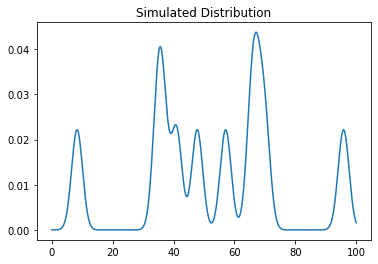

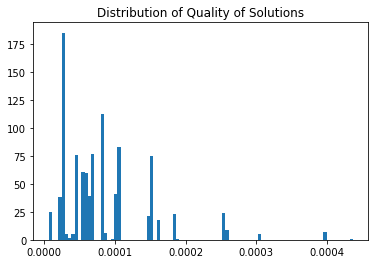

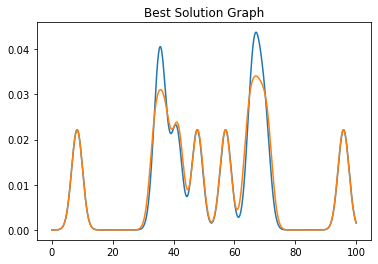

Best Loss: 1.0985412002463835e-05


In [87]:
#number of normals
k = 10
#lower bound for possible centers
L = 0
#simulating true centers
grades = L + np.random.rand(k)*(100-L)

#number of points to simulate distribution
n = 10000
#variance of simulated normals
s = 1.8
#discrete positions
x = np.linspace(0,100,n)
#pdf values at positions
p = pdf(x,grades,s)

plt.title('Simulated Distribution')
plt.plot(x,p)
plt.show()

#number of sub steps
I = 20
#number of solutions
N = 1000
#Pull a list of soultions and losses
M, L = list_EM(x,p,k,I,N)

plt.title('Distribution of Quality of Solutions')
plt.hist(L, bins = 3*int(np.sqrt(N)))
plt.show()

#Best Solution Graph
ind = np.argmin(L)

m = M[ind]
P = pdf(x,m,s)

plt.title('Best Solution Graph')
plt.plot(x,p)
plt.plot(x,P)
#plt.scatter(grades, np.zeros(k))
#plt.scatter(m, np.zeros(k), color = 'r')
plt.show()
print('Best Loss:',l)


# #Simulation of solutions
# for q in range(10):
#     g = np.random.rand(k)*100
#     #print(np.sort(EM_graph(x,p,g,200)))
#     #print(np.sort(grades))
#     m = EM(x,p,g,800)
#     P = pdf(x,m,s)
#     plt.plot(x,p)
#     plt.plot(x,P)
#     plt.scatter(grades, np.zeros(k))
#     plt.scatter(g, np.zeros(k))
#     plt.scatter(m, np.zeros(k), color = 'r')
#     plt.show()
#     print(np.mean((p-P)**2))
# #print(np.sum(pdf(x,EM(x,p,g,200),s))*dx,np.sum(p)*dx)

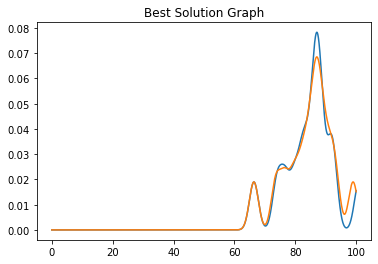

8.903291501631599e-06


In [116]:
#Convolution
g_student = 100*np.array([0.66413662, 0.76660342, 0.86622391, 0.88045541, 0.82163188,
       0.9259962 , 0.91461101, 0.88614801, 0.85768501, 1.00948767,
       0.79696395, 0.74003795, 0.83586338, 0.86907021])
k = len(g_student)
y = pdf(x,g_student,1.5)
#Deconvolution
m, l = best_EM(x,y,k,20,400, False, B = 60)
Y = pdf(x,m,1.5)

#Graph
plt.plot(x,y)
plt.plot(x,Y)
plt.title('Best Solution Graph')
plt.show()
print(l)

In [118]:
print(np.sort(m))
print(np.sort(g_student))

[66.39009324 73.59063149 76.48696305 79.44834468 81.91090012 83.82295371
 85.35259139 86.82652911 86.96159889 88.25167701 89.54448954 91.3842876
 93.24076704 98.98746074]
[ 66.413662  74.003795  76.660342  79.696395  82.163188  83.586338
  85.768501  86.622391  86.907021  88.045541  88.614801  91.461101
  92.59962  100.948767]


In [119]:
dx = 100/n
dx

0.01

In [120]:
np.sum(y)*dx

0.9473777948719349